In [2]:
# Import Data Manipulation library
import numpy as np
import pandas as pd

# Import Data Visualization library
import matplotlib.pyplot as plt
import seaborn as sns

#Import Filter Warnings library
import warnings
warnings.filterwarnings('ignore')

#Import Logging Libraries
import logging
logging.basicConfig(level=logging.INFO, filename= 'model.log', format='%(asctime)s - %(levelname)s - %(message)s', filemode='w')

#importing Scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import accuracy_score, confusion_matrix


In [6]:
##IMporting Dataset using Pandas function

df = pd.read_csv('bank.csv', sep = ';')

df.sample(frac = 1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2903,53,management,married,tertiary,no,4446,yes,no,unknown,14,may,429,1,-1,0,unknown,no
754,35,blue-collar,married,secondary,no,1949,yes,no,unknown,2,jun,200,3,-1,0,unknown,no
2350,34,technician,married,secondary,no,0,yes,no,cellular,29,aug,116,4,-1,0,unknown,no
3482,59,retired,married,secondary,no,5706,yes,no,cellular,25,jul,471,2,-1,0,unknown,no
3945,42,entrepreneur,married,tertiary,no,157,yes,yes,unknown,7,may,650,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2986,34,management,single,tertiary,no,1,no,no,cellular,19,nov,582,1,-1,0,unknown,no
232,44,technician,single,secondary,no,33,yes,no,cellular,13,may,195,3,351,10,failure,no
1358,41,technician,married,secondary,no,0,no,no,cellular,11,mar,101,1,-1,0,unknown,no
4379,41,blue-collar,married,primary,no,1172,yes,no,unknown,15,may,153,1,-1,0,unknown,no


In [8]:
#Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB



Evaluate Descriptive Statistics : EDA

In [ ]:


#Step 1: Segregate Numerical and Categorical Columns 

categorical_columns = df.select_dtypes(include=['object'])
numerical_columns = df.select_dtypes(exclude=['object'])


In [22]:
#Step 2 : Evaluate Descriptive Stats

from collections import OrderedDict

stats = []


for i in numerical_columns.columns:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Mean':df[i].mean(),
        'Median':df[i].median(),
        'Mode':df[i].mode()[0],  # mode() returns a Series, take the first element
        'Min':df[i].min(),
        'Max':df[i].max(),
        'Standard Deviation':df[i].std(),
        'Variance':df[i].var(),
        'Skewness':df[i].skew(),
        'Kurtosis':df[i].kurtosis(),
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR': df[i].quantile(0.75) - df[i].quantile(0.25),
        
    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)

report

,Feature,Mean,Median,Mode,Min,Max,Standard Deviation,Variance,Skewness,Kurtosis,Q1,Q3,IQR
0,age,41.170095,39.0,34,19,87,10.576211,1.118562e+02,0.699501,0.348775,33.0,49.0,16.0
1,balance,1422.657819,444.0,0,-3313,71188,3009.638142,9.057922e+06,6.596431,88.390332,69.0,1480.0,1411.0
2,day,15.915284,16.0,20,1,31,8.247667,6.802402e+01,0.094627,-1.039531,9.0,21.0,12.0
3,duration,263.961292,185.0,123,4,3025,259.856633,6.752547e+04,2.772420,12.530050,104.0,329.0,225.0
4,campaign,2.793630,2.0,1,1,50,3.109807,9.670897e+00,4.743914,37.168920,1.0,3.0,2.0
5,pdays,39.766645,-1.0,-1,-1,871,100.121124,1.002424e+04,2.717071,7.957128,-1.0,-1.0,0.0
6,previous,0.542579,0.0,0,0,25,1.693562,2.868153e+00,5.875259,51.995212,0.0,0.0,0.0


NOTE :

In [28]:

'''
**The logistic function is based on the sigmoid function

 **Whenever you are evaluate the descriptive statistics make 
  sure that IQR of any column cannot be zero, that signifies 
  that such column will not contribute in the machine learning performance.
  Infact that will lower the performance of the model.
  So, we need to drop such columns. 
  
  '''

'\n**The logistic function is based on the sigmoid function\n\n **Whenever you are evaluate the descriptive statistics make \n  sure that IQR of any column cannot be zero, that signifies \n  that such column will not contribute in the machine learning performance.\n  Infact that will lower the performance of the model.\n  So, we need to drop such columns. \n  \n  '

<Axes: xlabel='month', ylabel='duration'>

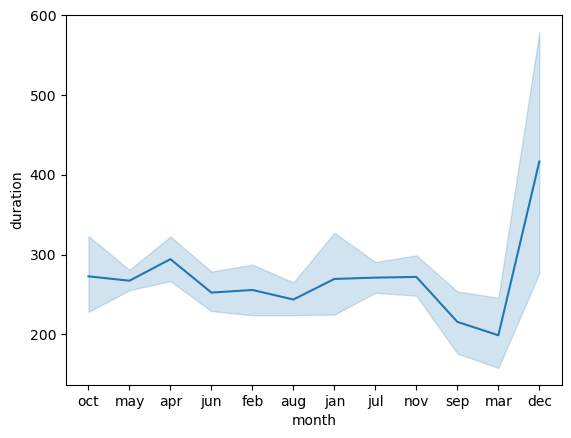

In [ ]:
#Month-wise call Duration trend analysis

sns.lineplot( x=df['month'], y=df['duration'])